# Decision Making for Branch Location Selection - A Forsquare API and K Means Clustering Solution

## Introduction/Business Problem

#### A Catering Service Company located in Berlin wants to find out the best locations for their Branches. The decision making is based on two factors
- Quick and effective delivery: to increase the customer satisfaction providing a fast response to their customer demands.
- Minimize operational costs: to increase the operational efficiency reducing their transport costs.

In order to achieve that, the main business goal is to locate the logistic centres as close as possible to the customers. It is needed therefore to collect data about hotel locations and then use a clustering machine learning algorithm to determine the best location for the branches. The process steps are as follows: 

1. Collect the data: we use Foursquare API to collect the data. We select as a reference location the Brandenburg Gate, a very centric location in order to get the data from hotels in 2km around, covering the main touristic areas. Then we use the keyword 'hotel' to make a request to the API.
2. Clean the data: we are interested in data related to locations such coordinates, district names and addresses. So we prepare a data frame with the valuable information and another with only numeric values for the subsequent analysis.
3. K-means clustering: Clustering the location data, we can make different groups or clusters. Each group will be assigned to a branch
4. Centroids: the recommended branch location is the one that minimize the distances with the target hotels. In other words, the centroid of the clusters. These points are the starting point of finding a location for our branches, the closest to the centroid, the fewer the operational costs and the quicker the response to our customer demands.

#### 1. Collect the data: we use Foursquare API to collect the data. We select as a reference location the Brandenburg Gate, a very centric location in order to get the data from hotels in 2km around, covering the main touristic areas. Then we use the keyword 'hotel' to make a request to the API.

In [446]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [447]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

In [448]:
CLIENT_ID = 'PAMHIJMBKC2PBHPLDY0AAE3SULFPCQIG3MQLQ52YR15OL4PQ' # your Foursquare ID
CLIENT_SECRET = '5PG1SAXG0EUVZZINYUUDMXBAVJ1MQVLS3XIYEUIQRLGTEQ3R' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PAMHIJMBKC2PBHPLDY0AAE3SULFPCQIG3MQLQ52YR15OL4PQ
CLIENT_SECRET:5PG1SAXG0EUVZZINYUUDMXBAVJ1MQVLS3XIYEUIQRLGTEQ3R


In [449]:
address = 'Brandenburg Gate, Pariser Platz, 10117 Berlin'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.51628045 13.37770188288172


In [450]:
search_query = 'hotel'
radius = 2000
print(search_query + ' .... OK!')

hotel .... OK!


In [451]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=PAMHIJMBKC2PBHPLDY0AAE3SULFPCQIG3MQLQ52YR15OL4PQ&client_secret=5PG1SAXG0EUVZZINYUUDMXBAVJ1MQVLS3XIYEUIQRLGTEQ3R&ll=52.51628045,13.37770188288172&v=20180604&query=hotel&radius=2000&limit=200'

In [452]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeb5b1047b43d00230a8d1c'},
 'response': {'venues': [{'id': '4adcda72f964a520274521e3',
    'name': 'Hotel Adlon Kempinski Berlin',
    'location': {'address': 'Unter den Linden 77',
     'crossStreet': 'Pariser Platz',
     'lat': 52.51603805458656,
     'lng': 13.380124568939209,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.51603805458656,
       'lng': 13.380124568939209}],
     'distance': 166,
     'postalCode': '10117',
     'cc': 'DE',
     'city': 'Berlin',
     'state': 'Berlin',
     'country': 'Deutschland',
     'formattedAddress': ['Unter den Linden 77 (Pariser Platz)',
      '10117 Berlin',
      'Deutschland']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '78119702'},
    're

In [453]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4adcda72f964a520274521e3,Hotel Adlon Kempinski Berlin,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]",v-1592482543,False,Unter den Linden 77,Pariser Platz,52.516038,13.380125,"[{'label': 'display', 'lat': 52.51603805458656, 'lng': 13.380124568939209}]",166,10117,DE,Berlin,Berlin,Deutschland,"[Unter den Linden 77 (Pariser Platz), 10117 Berlin, Deutschland]",78119702,NaN
1,4adcda72f964a5204e4521e3,Hotel NH Collection Berlin Mitte Friedrichstrasse,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]",v-1592482543,False,Friedrichstr. 96,Georgenstr.,52.519688,13.388842,"[{'label': 'display', 'lat': 52.51968756858481, 'lng': 13.38884174823761}]",844,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 96 (Georgenstr.), 10117 Berlin, Deutschland]",NaN,Mitte
2,4bd7d6155cf276b0bd209c00,Hotel Meliá Berlin,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]",v-1592482543,False,Friedrichstr. 103,Reichstagufer,52.521368,13.387927,"[{'label': 'display', 'lat': 52.521367608183006, 'lng': 13.387927129190142}]",894,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 103 (Reichstagufer), 10117 Berlin, Deutschland]",NaN,NaN
3,4b4e26f2f964a52020e326e3,Berlin Marriott Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]",v-1592482543,False,Inge-Beisheim-Platz 1,Hans-von-Bülow-Str.,52.510911,13.376140,"[{'label': 'display', 'lat': 52.51091092204795, 'lng': 13.376140147447586}]",607,10785,DE,Berlin,Berlin,Deutschland,"[Inge-Beisheim-Platz 1 (Hans-von-Bülow-Str.), 10785 Berlin, Deutschland]",131925870,NaN
4,55a02598498ebf3dbd6cb07c,Hotel Amano Grand Central,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]",v-1592482543,False,Heidestr. 62,NaN,52.527225,13.370558,"[{'label': 'display', 'lat': 52.527225356218786, 'lng': 13.370557818671157}]",1310,10557,DE,Berlin,Berlin,Deutschland,"[Heidestr. 62, 10557 Berlin, Deutschland]",NaN,NaN


#### 2. Clean the data: we are interested in data related to locations such coordinates, district names and addresses. So we prepare a data frame with the valuable information and another with only numeric values for the subsequent analysis.

In [454]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Hotel Adlon Kempinski Berlin,Hotel,Unter den Linden 77,Pariser Platz,52.516038,13.380125,"[{'label': 'display', 'lat': 52.51603805458656, 'lng': 13.380124568939209}]",166,10117,DE,Berlin,Berlin,Deutschland,"[Unter den Linden 77 (Pariser Platz), 10117 Berlin, Deutschland]",NaN,4adcda72f964a520274521e3
1,Hotel NH Collection Berlin Mitte Friedrichstrasse,Hotel,Friedrichstr. 96,Georgenstr.,52.519688,13.388842,"[{'label': 'display', 'lat': 52.51968756858481, 'lng': 13.38884174823761}]",844,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 96 (Georgenstr.), 10117 Berlin, Deutschland]",Mitte,4adcda72f964a5204e4521e3
2,Hotel Meliá Berlin,Hotel,Friedrichstr. 103,Reichstagufer,52.521368,13.387927,"[{'label': 'display', 'lat': 52.521367608183006, 'lng': 13.387927129190142}]",894,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 103 (Reichstagufer), 10117 Berlin, Deutschland]",NaN,4bd7d6155cf276b0bd209c00
3,Berlin Marriott Hotel,Hotel,Inge-Beisheim-Platz 1,Hans-von-Bülow-Str.,52.510911,13.376140,"[{'label': 'display', 'lat': 52.51091092204795, 'lng': 13.376140147447586}]",607,10785,DE,Berlin,Berlin,Deutschland,"[Inge-Beisheim-Platz 1 (Hans-von-Bülow-Str.), 10785 Berlin, Deutschland]",NaN,4b4e26f2f964a52020e326e3
4,Hotel Amano Grand Central,Hotel,Heidestr. 62,NaN,52.527225,13.370558,"[{'label': 'display', 'lat': 52.527225356218786, 'lng': 13.370557818671157}]",1310,10557,DE,Berlin,Berlin,Deutschland,"[Heidestr. 62, 10557 Berlin, Deutschland]",NaN,55a02598498ebf3dbd6cb07c
5,Steigenberger Hotel Am Kanzleramt,Hotel,Ella-Trebe-Str. 5,NaN,52.523610,13.368045,"[{'label': 'display', 'lat': 52.523609784492315, 'lng': 13.368045438056027}]",1045,10557,DE,Berlin,Berlin,Deutschland,"[Ella-Trebe-Str. 5, 10557 Berlin, Deutschland]",NaN,5339b708498e2c424972e4bf
6,Hotel Albrechtshof,Hotel,Albrechtstr. 8,NaN,52.522183,13.384237,"[{'label': 'display', 'lat': 52.5221833255258, 'lng': 13.384237026050494}]",792,12165,DE,Berlin,Berlin,Deutschland,"[Albrechtstr. 8, 12165 Berlin, Deutschland]",Mitte,4bac8e35f964a520fdfa3ae3
7,Hotel Gat Point Charlie,Hotel,Mauerstr. 81,Krausenstr.,52.508898,13.388239,"[{'label': 'display', 'lat': 52.50889793775351, 'lng': 13.38823873091376}]",1088,10117,DE,Berlin,Berlin,Deutschland,"[Mauerstr. 81 (Krausenstr.), 10117 Berlin, Deutschland]",NaN,4c9619c6f244b1f7fc4c311d
8,Hotel AMO by Amano,Hotel,Friedrichstr. 113,Oranienburger Str.,52.525895,13.387579,"[{'label': 'display', 'lat': 52.525895, 'lng': 13.387579}]",1262,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 113 (Oranienburger Str.), 10117 Berlin, Deutschland]",NaN,5d0aa6e822d490002c2ec3fe
9,Maritim proArte Hotel Berlin,Hotel,Friedrichstr. 151,Dorotheenstr.,52.518427,13.387909,"[{'label': 'display', 'lat': 52.518426790469206, 'lng': 13.387908983859232}]",731,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 151 (Dorotheenstr.), 10117 Berlin, Deutschland]",NaN,4adcda6df964a520c74421e3


In [455]:
dataframe_filtered.name

0     Hotel Adlon Kempinski Berlin                          
1     Hotel NH Collection Berlin Mitte Friedrichstrasse     
2     Hotel Meliá Berlin                                    
3     Berlin Marriott Hotel                                 
4     Hotel Amano Grand Central                             
5     Steigenberger Hotel Am Kanzleramt                     
6     Hotel Albrechtshof                                    
7     Hotel Gat Point Charlie                               
8     Hotel AMO by Amano                                    
9     Maritim proArte Hotel Berlin                          
10    Hotel M68                                             
11    Hotel Eurostars Berlin                                
12    MEININGER Hotel Berlin Hauptbahnhof                   
13    Albrechtshof Hotel-Betriebs                           
14    Hotel NH Collection Berlin Mitte am Checkpoint Charlie
15    MEININGER Hotel Berlin Mitte Humboldthaus             
16    Hotel de Rome     

In [456]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Brandenburg Gate',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [457]:
dataframe_filtered.columns

Index(['name', 'categories', 'address', 'crossStreet', 'lat', 'lng',
       'labeledLatLngs', 'distance', 'postalCode', 'cc', 'city', 'state',
       'country', 'formattedAddress', 'neighborhood', 'id'],
      dtype='object')

In [458]:
X = dataframe_filtered.drop(['name', 'categories', 'address', 'crossStreet', 'labeledLatLngs', 'distance', 'postalCode', 'cc', 'city', 'state',
       'country', 'formattedAddress', 'neighborhood', 'id'],axis=1)

#### 3. K-means clustering: Clustering the location data, we can make different groups or clusters. Each group will be assigned to a branch

In [459]:
# Finding out the optimal k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

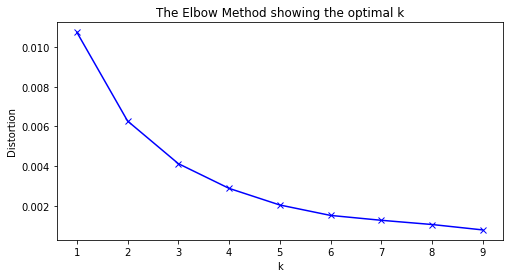

In [460]:
# Plotting the elbow method
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [461]:
k=6
kmeans = KMeans(n_clusters = k,random_state=0).fit(X)
dataframe_filtered.insert(0, 'Cluster Labels', kmeans.labels_)
dataframe_filtered.head()

,Cluster Labels,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,5,Hotel Adlon Kempinski Berlin,Hotel,Unter den Linden 77,Pariser Platz,52.516038,13.380125,"[{'label': 'display', 'lat': 52.51603805458656, 'lng': 13.380124568939209}]",166,10117,DE,Berlin,Berlin,Deutschland,"[Unter den Linden 77 (Pariser Platz), 10117 Berlin, Deutschland]",NaN,4adcda72f964a520274521e3
1,0,Hotel NH Collection Berlin Mitte Friedrichstrasse,Hotel,Friedrichstr. 96,Georgenstr.,52.519688,13.388842,"[{'label': 'display', 'lat': 52.51968756858481, 'lng': 13.38884174823761}]",844,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 96 (Georgenstr.), 10117 Berlin, Deutschland]",Mitte,4adcda72f964a5204e4521e3
2,0,Hotel Meliá Berlin,Hotel,Friedrichstr. 103,Reichstagufer,52.521368,13.387927,"[{'label': 'display', 'lat': 52.521367608183006, 'lng': 13.387927129190142}]",894,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 103 (Reichstagufer), 10117 Berlin, Deutschland]",NaN,4bd7d6155cf276b0bd209c00
3,5,Berlin Marriott Hotel,Hotel,Inge-Beisheim-Platz 1,Hans-von-Bülow-Str.,52.510911,13.376140,"[{'label': 'display', 'lat': 52.51091092204795, 'lng': 13.376140147447586}]",607,10785,DE,Berlin,Berlin,Deutschland,"[Inge-Beisheim-Platz 1 (Hans-von-Bülow-Str.), 10785 Berlin, Deutschland]",NaN,4b4e26f2f964a52020e326e3
4,3,Hotel Amano Grand Central,Hotel,Heidestr. 62,NaN,52.527225,13.370558,"[{'label': 'display', 'lat': 52.527225356218786, 'lng': 13.370557818671157}]",1310,10557,DE,Berlin,Berlin,Deutschland,"[Heidestr. 62, 10557 Berlin, Deutschland]",NaN,55a02598498ebf3dbd6cb07c


In [462]:
dataframe_filtered['Cluster Labels'].value_counts()

0    15
5    11
3    7 
2    7 
4    6 
1    4 
Name: Cluster Labels, dtype: int64

In [469]:
df1 = dataframe_filtered.sort_values('Cluster Labels')
df2 = [df1['Cluster Labels'],df1['name']]
df3 = pd.concat(df2,axis=1)
df3

,Cluster Labels,name
8,0,Hotel AMO by Amano
15,0,MEININGER Hotel Berlin Mitte Humboldthaus
27,0,HSH Hotel Apartments Mitte
13,0,Albrechtshof Hotel-Betriebs
34,0,Hotel Zarenhof Berlin-Mitte
11,0,Hotel Eurostars Berlin
20,0,Riverside Hotel
9,0,Maritim proArte Hotel Berlin
17,0,H+ Hotel Berlin Mitte
21,0,Hotel Adelante


In [464]:
# creating map
clusters_map = folium.Map(location=[latitude,longitude],zoom_start=13)

# setting color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding markers to the map
for lat, lon, cluster in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(clusters_map)
       
clusters_map

#### 4. Centroids: the recommended branch location is the one that minimize the distances with the target hotels. In other words, the centroids of the clusters. These points are the starting point of finding a location for our branches, the closer to the centroid, the fewer the operational costs and the quicker the response to our customer demands

In [465]:
kmeans.cluster_centers_

array([[52.52492946, 13.38782085],
       [52.5052461 , 13.36283482],
       [52.51197607, 13.39674661],
       [52.52761048, 13.37468885],
       [52.52463624, 13.40174913],
       [52.50753146, 13.38309565]])

In [466]:
centroid_list = list(kmeans.cluster_centers_)

In [467]:
# creating map
centroids_map = folium.Map(location=[latitude,longitude],zoom_start=13)

# setting color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding markers to the map
for num, item in enumerate(centroid_list, start=0):
    folium.CircleMarker(
        [item[0], item[1]],
        radius=8,
        popup='Branch {}'.format(num+1),
        color=rainbow[num],
        fill=True,
        fill_color=rainbow[num],
        fill_opacity=1).add_to(centroids_map)
       
centroids_map

In [468]:
for n in df3['Cluster Labels'].unique():
    print("Branch {} assigned to:".format(n+1))
    print(df3[df3['Cluster Labels']==n]['name'])

Branch 1 assigned to:
8     Hotel AMO by Amano                               
15    MEININGER Hotel Berlin Mitte Humboldthaus        
27    HSH Hotel Apartments Mitte                       
13    Albrechtshof Hotel-Betriebs                      
34    Hotel Zarenhof Berlin-Mitte                      
11    Hotel Eurostars Berlin                           
20    Riverside Hotel                                  
9     Maritim proArte Hotel Berlin                     
17    H+ Hotel Berlin Mitte                            
21    Hotel Adelante                                   
6     Hotel Albrechtshof                               
32    Hotel Augustinenhof                              
48    Honigmond Garden Hotel & Boardinghouse           
2     Hotel Meliá Berlin                               
1     Hotel NH Collection Berlin Mitte Friedrichstrasse
Name: name, dtype: object
Branch 2 assigned to:
31    Hotel Altberlin                      
19    Maritim Hotel Berlin                 
49